## 생존여부 예측모델 만들기
### 학습용 데이터 (X_train, y_train)을 이용하여 생존 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 accuracy 평가지표에 따라 채점)

(가) 제공 데이터 목록
- y_train: 생존여부(학습용)
- X_trian, X_test : 승객 정보 (학습용 및 평가용)

(나) 데이터 형식 및 내용
- y_trian (712명 데이터)

**시험환경 세팅은 예시문제와 동일한 형태의 X_train, y_train, X_test 데이터를 만들기 위함임**

### 유의사항
- 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.
- 수험번호.csv파일이 만들어지도록 코드를 제출한다.
- 제출한 모델의 성능은 accuracy로 평가함

csv 출력형태

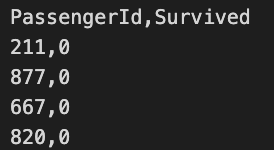

## [참고]작업형2 문구
- 출력을 원하실 경우 print() 함수 활용
- 예시) print(df.head())
- getcwd(), chdir() 등 작업 폴더 설정 불필요
- 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

### 데이터 파일 읽기 예제
- import pandas as pd
- X_test = pd.read_csv("data/X_test.csv")
- X_train = pd.read_csv("data/X_train.csv")
- y_train = pd.read_csv("data/y_train.csv")

### 사용자 코딩

### 답안 제출 참고
- 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
- pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)

In [1]:
# import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [2]:
# 1. 데이터 로드

train=pd.read_csv("../input/titanic/train.csv")
test=pd.read_csv("../input/titanic/test.csv")

print(f'"Train shape: {train.shape}')
print(f'"Test shape: {test.shape}')
print('-----------------------------')
print('데이터 정보 확인')
print(train.info())
print('-----------------------------')
print('데이터 예시 확인')
print(test.head(10))
print('-----------------------------')
print("결측치 확인:")
print(train.isnull().sum())

"Train shape: (891, 12)
"Test shape: (418, 11)
-----------------------------
데이터 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-----------------------------
데이터 예시 확인
   PassengerId  Pclass                                          Name     Sex  \
0          892       3          

In [3]:
# 2. 타겟 분리
X_train = train.drop('Survived',axis=1)  # 타겟 제거
y_train = train['Survived']  

print('y_train예시 ')
print(y_train.head(10))
print('------------------------')
print('X_train예시 ')
print(X_train.head(10))
print('------------------------')
print('타겟 분포')
print(y_train.value_counts())

y_train예시 
0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64
------------------------
X_train예시 
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   
5            6       3                                   Moran, Mr. James   
6            7       1                            McCarthy, Mr. Timothy J   
7            8       3                     Palsson, Master. Gosta Leonard   
8            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           10       2                Nasser, Mrs. Nicholas (Adele Achem)   

      

In [4]:
# 3.결측치 처리
# 수치형: 중앙값으로 처리(이상치에 더 강하다)
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
print(f'numeric_cols:{numeric_cols}')

for col in numeric_cols:
    median_val = X_train[col].median()

    # X_train이랑 test에 같은 값을 대입한다. 
    X_train[col] = X_train[col].fillna(median_val)
    test[col] = test[col].fillna(median_val)

# 범주형: 최빈값으로 처리
categorical_cols = X_train.select_dtypes(include=['object']).columns
print(f'categorical_cols:{categorical_cols}')

for col in categorical_cols:
    mode_val = X_train[col].mode()[0]

    # X_train이랑 test에 같은 값을 대입한다. 
    X_train[col] = X_train[col].fillna(mode_val)
    test[col] = test[col].fillna(mode_val)

print("결측치 확인:")
print(X_train.isnull().sum())
print(test.isnull().sum())

numeric_cols:Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
categorical_cols:Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
결측치 확인:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [5]:
# 4. 인코딩
# 범주형 변수 레이블 인코딩
le_dict = {} # 인코더 저장소 
for col in categorical_cols:
    le = LabelEncoder()
    # train + test 합쳐서 fit (중요!)
    all_values = pd.concat([X_train[col], test[col]], axis=0)
    # 합친 것을 학습
    le.fit(all_values)

    # 학습 후, X_train,test에 변환 
    X_train[col] = le.transform(X_train[col])
    test[col] = le.transform(test[col])

    # 학습된 값을 le_dict에 저장. 나중에 새로운 데이터가 와도 같은 매핑을 사용하도록 
    le_dict[col] = le

# 잘 되었나 확인하기
print(f'X_train:{X_train.head(10)}')
print('-----------------------')
print(f'test:{test.head(10)}')

X_train:   PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0            1       3   155    1  22.0      1      0     720   7.2500     60   
1            2       1   286    0  38.0      1      0     816  71.2833    106   
2            3       3   523    0  26.0      0      0     914   7.9250     60   
3            4       1   422    0  35.0      1      0      65  53.1000     70   
4            5       3    22    1  35.0      0      0     649   8.0500     60   
5            6       3   818    1  28.0      0      0     373   8.4583     60   
6            7       1   767    1  54.0      0      0     109  51.8625    163   
7            8       3   914    1   2.0      3      1     541  21.0750     60   
8            9       3   605    0  27.0      0      2     477  11.1333     60   
9           10       2   847    0  14.0      1      0     174  30.0708     60   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2  
5         1  
6 

In [6]:
# 5. 검증 데이터 분할
# 검증 데이터를 통해 미리 성능 확인!
# 80% 학습용, 20% 검증용 
# 분류문제=무조건 stratify사용!(같은 비율로 나눠지게 함)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print('X_train 데이터 분리 확인 ')
print(X_train.shape)
print(X_tr.shape)
print(X_val.shape)

print('y_train 데이터 분리 확인 ')
print(y_train.shape)
print(y_tr.shape)
print(y_val.shape)

X_train 데이터 분리 확인 
(891, 11)
(712, 11)
(179, 11)
y_train 데이터 분리 확인 
(891,)
(712,)
(179,)


In [7]:
# 6. 모델 학습 및 평가
# 모델 선택 
model = RandomForestClassifier(random_state=42, n_estimators=200)

# 모델 학습
model.fit(X_tr, y_tr)

# 검증 성능 확인
print(model.classes_)  # [0 1] 1(생존) 확률을 확인해보자. 

# [0 1] 1(생존) 확률을 확인해보자. 
val_pred_proba = model.predict_proba(X_val)[:, 1]
val_pred = model.predict(X_val)

# ROC-AUC,Accuracy는 1에 가까울수록 좋다. 85이상이면 좋다. 
print(f"ROC-AUC: {roc_auc_score(y_val, val_pred_proba)}")
print(f"Accuracy: {accuracy_score(y_val, val_pred)}")
# 맞는 label을 적용해야한다. 
print(f'F1_score:{f1_score(y_val, val_pred, pos_label=1)}')

[0 1]
ROC-AUC: 0.8440052700922266
Accuracy: 0.8044692737430168
F1_score:0.7286821705426356


In [8]:
# 7. 최종 예측 및 제출
# 전체 데이터로 학습
# 시간이 있다면 파라미터 조정(max_depth=10)
final_model = RandomForestClassifier(random_state=42, n_estimators=200)

# 모델 학습
final_model.fit(X_train, y_train)

# 테스트 예측 (0 또는 1로 예측)
test_pred_proba = final_model.predict(test)  # 클래스 예측 (0 또는 1)

print("예측 결과 확인:")
print("클래스:", final_model.classes_)  # [0, 1]
print("처음 10개 예측:", test_pred_proba[:10])

# 제출 파일 생성
submit = pd.DataFrame({
    'PassengerId': test['PassengerId'],  # PassengerId 포함
    'Survived': test_pred_proba  # 0 또는 1
})

submit.to_csv('submission-titanic.csv', index=False)
print("제출 파일 생성 완료!")
print(submit.head(10))

예측 결과 확인:
클래스: [0 1]
처음 10개 예측: [0 1 0 0 0 0 0 0 1 0]
제출 파일 생성 완료!
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         0
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0
